In [1]:
import seaborn as sns
import pylab as pl
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
import pickle
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal as sp_sig
from sklearn.cross_decomposition import PLSRegression, CCA
import scipy.stats as sp_st
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut, train_test_split, KFold
from sklearn.metrics import explained_variance_score

import sys
sys.path.append('/home/jyotika/Utils/hddm/')

import hddm



In [2]:
off_data_dir1 = "../churchland_code/Data/GA/Cx_D1_mostly_positive/"
off_data_dir = "../churchland_code/Data/GA/Cx_D1_mostly_positive/o_f_f/" #" wo_corticostriatal/"
figure_dir = "../churchland_code/Figures/Cx_D1_mostly_positive/"

plt.rcParams["figure.facecolor"] = "w"

In [3]:
input_channels = ['CxI_common', 'Cx_left', 'Cx_right', 'D1STR_left', 'D1STR_right',
       'D2STR_left', 'D2STR_right', 'FSI_common', 'GPeP_left',
       'GPeP_right', 'GPi_left', 'GPi_right', 'STNE_left', 'STNE_right',
       'Th_left', 'Th_right']
nuclei = ["GPi","STNE","GPeP","D1STR","D2STR","Cx","Th"]
channels = ["left","right","common"]
comm_channels = ["FSI_common",'CxI_common']
lateralized_channels = list(set(input_channels)-set(comm_channels))

ddm_params = ["a","v","t","z"]

In [4]:
sum_cols = [ ch+"(sum)" for ch in nuclei]
diff_cols = [ ch+"(diff)" for ch in nuclei]

In [5]:
str_ch = ["STR(sum)","STR(diff)"]

In [6]:
sum_fr_rt_ddm = pd.read_csv(off_data_dir+"sum_diff_fr_before_plasticity.csv")

In [9]:

def get_and_plot_CCA(X,Y,x_fields,y_fields,tit="",xlims=(-1.5,1.5),ylims=(-1.0,1.0),return_comp = False,num_c=None,plot_sep=False):
    X_zscored = X.copy()
    Y_zscored = Y.copy()
   
    for xf in x_fields:
        X_zscored[xf] = (X_zscored[xf].values - X_zscored[xf].mean())/X_zscored[xf].std()

    for yf in y_fields:
        Y_zscored[yf] = (Y_zscored[yf].values - Y_zscored[yf].mean())/Y_zscored[yf].std()

    for xf in x_fields:
        X_zscored[xf] = X_zscored[xf].values/np.max(np.abs(X_zscored[xf]))

    for yf in y_fields:
        Y_zscored[yf] = Y_zscored[yf].values/np.max(np.abs(Y_zscored[yf]))

    cca = CCA(n_components=3)
    cca.fit(X_zscored[x_fields], Y_zscored[y_fields])
    
    if "a" in x_fields and num_c!=None and num_c>2:
        cca.x_loadings_[:,2] = -cca.x_loadings_[:,2]
        cca.y_loadings_[:,2] = -cca.y_loadings_[:,2]
    cmap = cm.get_cmap('PiYG',11)
    
    pl.figure()
    g2 = sns.heatmap(cca.x_loadings_,cmap=cmap,yticklabels=x_fields,vmin=xlims[0],vmax=xlims[1])
    g2.figure.suptitle(tit)
    g2.figure.subplots_adjust(left=0.18)
    
    
    pl.figure()
    g3 = sns.heatmap(cca.y_loadings_,cmap=cmap,yticklabels=y_fields,vmin=ylims[0],vmax=ylims[1])
    g3.figure.suptitle(tit)
    g3.figure.subplots_adjust(left=0.06,right=0.95)

    if return_comp == False:
        return g2,g3#,results_fr_ddm
    else:
        return g2,g3,cca#,results_fr_ddm



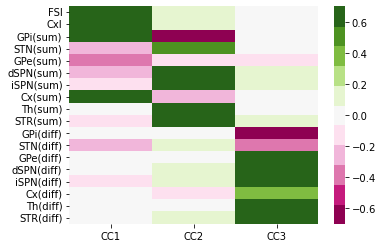

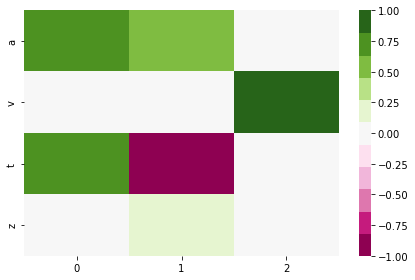

In [10]:
X = sum_fr_rt_ddm[sum_cols+diff_cols+comm_channels+str_ch+["seed","network_type"]]
Y = sum_fr_rt_ddm[["a","v","t","z","seed","network_type"]]

g2,g3,cca_off_all = get_and_plot_CCA(X,Y,comm_channels+sum_cols+[str_ch[0]]+diff_cols+[str_ch[1]],ddm_params,return_comp=True,xlims=(-0.7,0.7),plot_sep=True,num_c=3)

sum_cols_plot = ["dSPN(sum)" if "D1STR" in x else "iSPN(sum)" if "D2STR" in x else "STN(sum)" if "STNE"in x else "GPe(sum)" if "GPe" in x else x  for x in sum_cols+[str_ch[0]]]
diff_cols_plot = ["dSPN(diff)" if "D1STR" in x else "iSPN(diff)" if "D2STR" in x else "STN(diff)" if "STNE"in x else "GPe(diff)" if "GPe" in x else x  for x in diff_cols+[str_ch[1]]]
yticklabs = [x.split('_')[0] for x in comm_channels] + sum_cols_plot +diff_cols_plot
g2.axes.set_xticklabels(["CC1","CC2","CC3"])
g2.axes.set_yticklabels(yticklabs)
pl.tight_layout()

